#### **This notebook has visualization for RQ1**

In [1]:
import pandas as pd
import numpy as np

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

import importlib

#### packages
import helper.visualization as vz_hp
import config.config as config_hp

#### **1) Number of followers and following each target has**

In [2]:
poster_info_file = './../data/profile_info.pkl.gz'

df_poster = pd.read_pickle(poster_info_file)
avoid = ['not found', 'suspended']
df_poster_alive = df_poster.loc[~df_poster['verified'].isin(avoid)]

df_poster_alive = df_poster_alive.drop_duplicates()

df_poster_alive = df_poster_alive.astype({
    'followers_count':int,
    'following_count': int
})

print('Followers count :', df_poster_alive['followers_count'].median())
print('Following count :', df_poster_alive['following_count'].median())

Followers count : 22540.0
Following count : 707.0


./../plots/target_follower_following_count_a.png


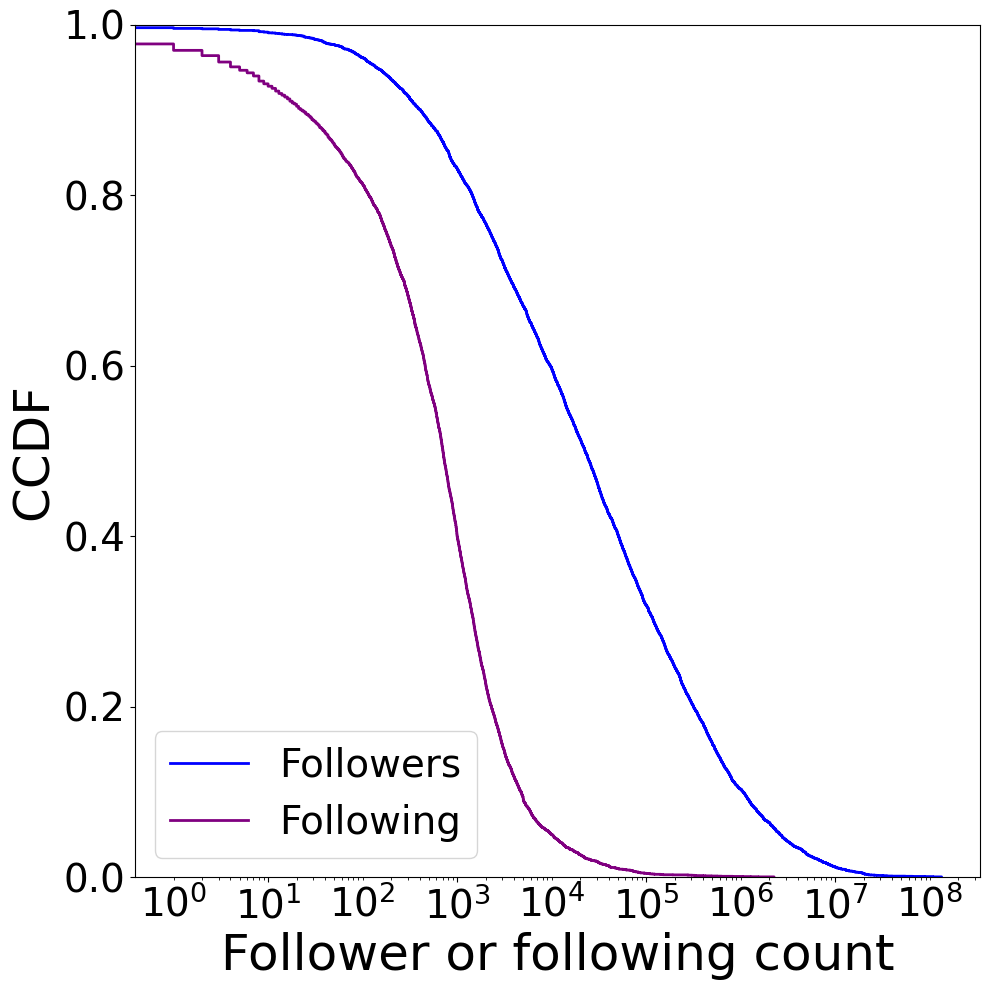

In [3]:
importlib.reload(vz_hp)

parameter =  {
        'data': [df_poster_alive, df_poster_alive],
        'figsize': (10, 10),
        'fontsize': 36,
        'tick_size': 28,
        'complementary': True,
        'complementary': True,
        'columns': [
            {'column': 'followers_count',
             'label': 'Followers',
             'color': 'blue'
            },
            {
            'column': 'following_count',
            'label': 'Following',
            'color': 'purple'
            }
        ],
        'ylabel': 'CCDF',
        'xlabel': 'Follower or following count',
        'legend_location': 'lower left',
        'legend_font': 28,
        'log_yscale': False,
        'log_xscale': True,
        'save': {
            'path': './../plots',
            'filename': 'target_follower_following_count_a.png'
        },
        'random_color': False,
    }
    
vz_hp.ccdf(parameter)

#### **2) Number of tweets targeted for each target**

##### **Load files**

In [4]:
importlib.reload(config_hp)

config = config_hp.config()
char_target = './../data/target_tweet.pkl.gz'
df_target_tweet = pd.read_pickle(
    char_target
)

./../plots/target_CCDF_no_of_tweet_targeted_b.png


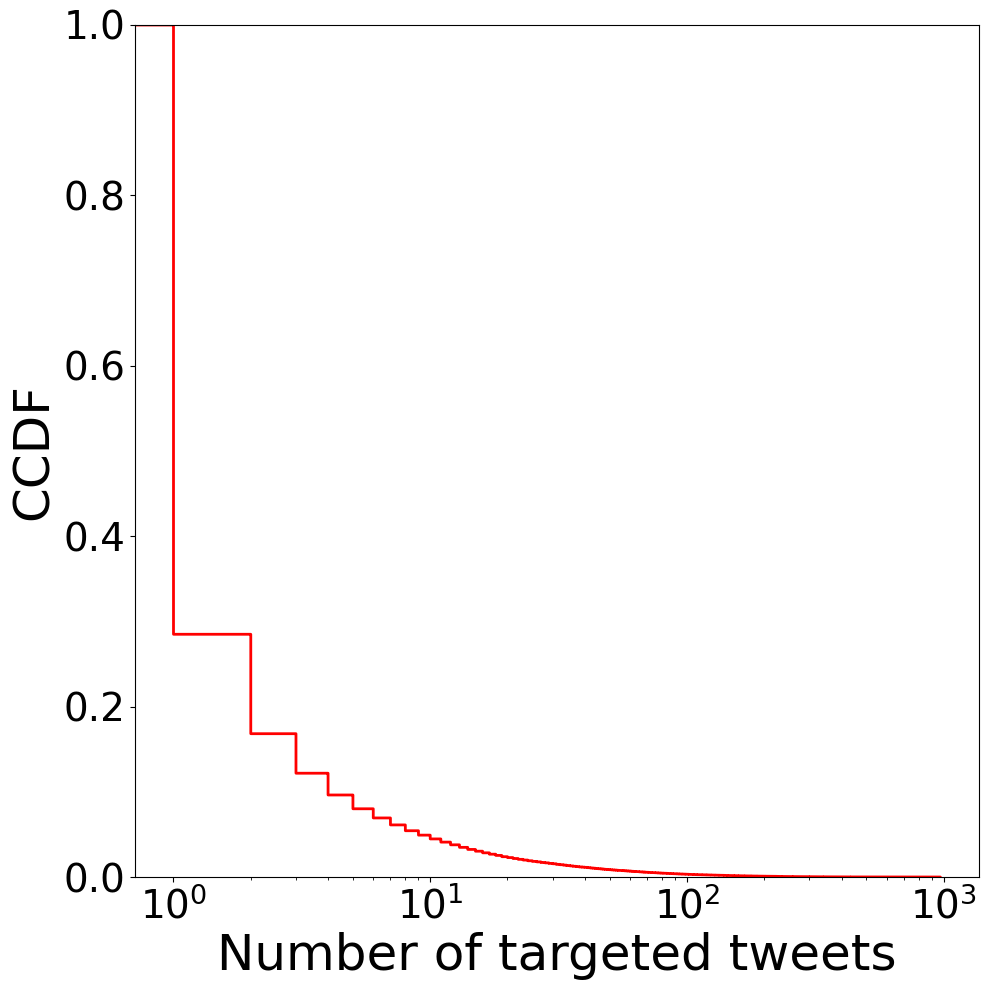

In [5]:
importlib.reload(vz_hp)

parameters = {
        'data': [df_target_tweet],
        'figsize': (10, 10),
        'fontsize': 36,
        'tick_size': 28,
        'complementary': True,
        'columns': [
            {'column': 'count',
             'label': 'Number of targeted tweets targeted',
            },
        ],
        'xlabel': 'Number of targeted tweets',
        'ylabel': '',
        'log_yscale': False,
        'log_xscale': True,
        'save': {
            'path': './../plots',
            'filename': 'target_CCDF_no_of_tweet_targeted_b.png'
        },
        'random_color': False
    }

vz_hp.ccdf(parameters)

In [6]:
print('Median number of tweet targeted :', 
      df_target_tweet['count'].median()
     )

Median number of tweet targeted : 1.0


#### **3) Number of IO replies per targeted tweet**

In [9]:
importlib.reload(config_hp)

config = config_hp.config()
reply_per_tweet = './../data/number_of_reply_per_tweet.pkl.gz'

df_reply_per_tweet = pd.read_pickle(reply_per_tweet)

./../plots/target_CCDF_target_tweet_reply_c.png


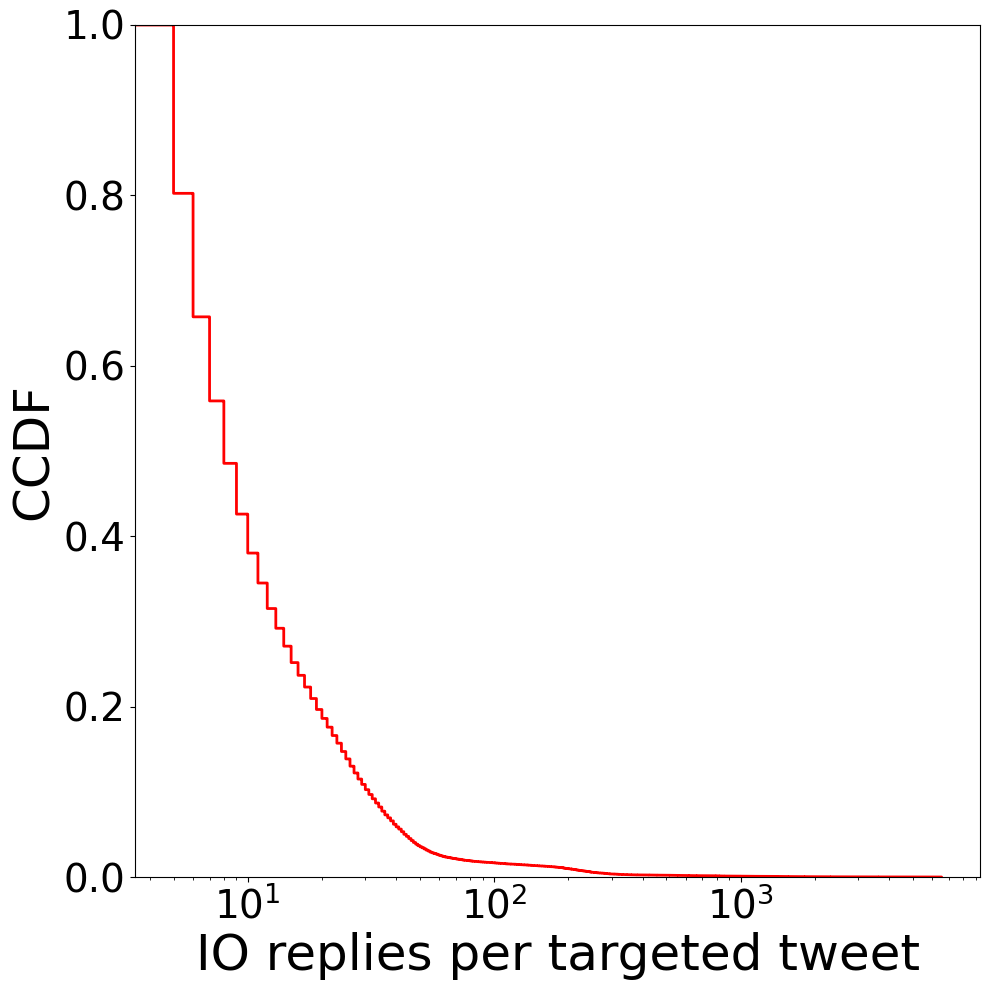

In [10]:
importlib.reload(vz_hp)

parameters = {
        'data': [df_reply_per_tweet],
        'figsize': (10, 10),
        'fontsize': 36,
        'tick_size': 28,
        'complementary': True,
        'columns': [
            {'column': 'reply_count',
             'label': 'IO replies per targeted tweet',
            },
        ],
        'xlabel':'IO replies per targeted tweet',
        'ylabel': 'Log(x)',
        'log_yscale': False,
        'log_xscale': True,
        'save': {
            'path': './../plots',
            'filename': 'target_CCDF_target_tweet_reply_c.png'
        },
        'random_color': False
    }

vz_hp.ccdf(parameters)

#### **4) Delay in IO replies**

In [12]:
import datetime
pos_conversation = './../data/positive_conversation.pkl.gz'

df_pos = pd.read_pickle(
    pos_conversation
)

df_pos['tweet_time'] = pd.to_datetime(df_pos['tweet_time'].apply(
    lambda t: t.replace(tzinfo=None)))

df_time = df_pos.sort_values(by=['tweet_time'], 
                    ascending=True).drop_duplicates()
df_time = df_time.drop_duplicates()

df_time['diff'] = df_time.groupby('poster_tweetid')['tweet_time'].transform(
    lambda x: x - x.iloc[0])


df_time = df_time.dropna(subset=['diff'])
df_time['diff'] = df_time['diff'] + datetime.timedelta(seconds=1)

df_time['diff_min'] = df_time['diff'].apply(
    lambda x: int(np.ceil((x.total_seconds() + 1) / 3600)))
df_time = df_time.loc[df_time['diff_min'] >= 1]

print('Min time diff :', df_time['diff'].min())
print('Max time diff :', df_time['diff'].max())

Min time diff : 0 days 00:00:01
Max time diff : 2967 days 12:31:07


./../plots/CDF_IO_replier_time_diff_replying_d.png


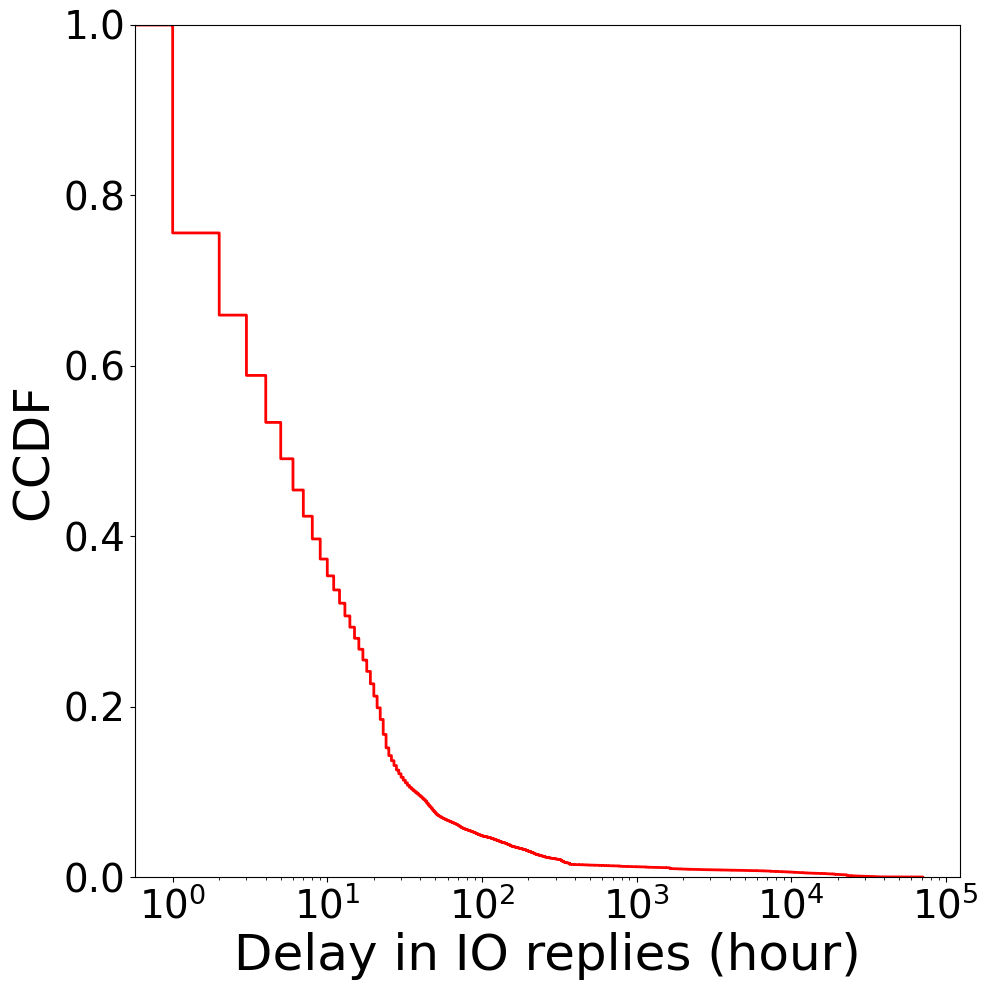

In [15]:
importlib.reload(config_hp)
importlib.reload(vz_hp)

parameters = {
        'data': [df_time],
        'figsize': (10, 10),
        'fontsize': 36,
        'tick_size': 28,
        'complementary': True,
        'columns': [
            {'column': 'diff_min',
             'label': 'IO',
            },{
            'column': 'diff_min',
             'label': 'Control'
            },
        ],
        'xlabel': 'Delay in IO replies (hour)',
        'ylabel': 'CDF',
       
        'log_xscale': True,
        'save': {
            'path': './../plots',
            'filename': 'CDF_IO_replier_time_diff_replying_d.png'
        },
        'random_color': False
}


vz_hp.ccdf(parameters)